In [67]:
import pandas as pd
import numpy as np
import pickle
from sklearn.metrics import *
import os
import itertools
import matplotlib.pyplot as plt
import seaborn as sns

## Closed set multiclass on train and dev

Train on 75% of train set

Grid search on 25$ of train set

Eval on dev set

In [68]:
result_root_path = '/nas/home/cborrelli/bot_speech/results/closed_set_multiclass_eval'


In [78]:
def my_plot_confusion_matrix(cm, x_labels, y_labels,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    from matplotlib import rcParams
    rcParams['font.family'] = 'serif'
    rcParams['text.usetex'] = 'true'
    rcParams['font.size'] = 28 
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    # Only use the labels that appear in the data
    #classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    #print(cm)
    
    cm[cm < 0.01] = 0
    
    fig, ax = plt.subplots(figsize=(18,18))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap, clim=(0,1))
    ax.figure.colorbar(im, ax=ax, shrink=0.7)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=x_labels, yticklabels=y_labels,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            if cm[i, j] > 0.01:
                ax.text(j, i, format(cm[i, j], fmt),
                        ha="center", va="center",
                        color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

In [70]:
nfft_list = [512, 256, 128]
hop_size_list = [256, 128, 64]
selected_features_list = [['lpc', 'bicoh'],['bicoh'],['lpc']]

number_lpc_order = 49
stop_lpc_order = 50
normalizers_keys = ["minmax", "zscore", "l2"]
classifiers_keys = ["svm", "rf"]


In [71]:
results_df = pd.DataFrame(columns=['nfft', 'hop_size', 'selected_features', 'number_lpc_order', 'stop_lpc_order', 
                                   'normalization', 'classifier', 
                                   'accuracy_train', 'accuracy_dev','accuracy_eval',
                                   'cm_train','cm_dev','cm_eval',
                                   'model_params' ])
for selected_features in selected_features_list:
    for fft_params in zip(nfft_list, hop_size_list):
        nfft = fft_params[0]
        hop_size = fft_params[1]
        for c in classifiers_keys:
            for n in normalizers_keys:
                result_name = "class_{}_norm_{}_nfft_{}_hop-size_{}_numberlpcorder_{}_stoplpcorder_{}".format(
                        c, n, nfft, hop_size,
                        number_lpc_order,
                        stop_lpc_order)

                result_name = result_name + "_selected_features_" + "-".join(
                    s for s in selected_features) + ".npy"

                result_filename = os.path.join(result_root_path, result_name)

                if os.path.exists(result_filename):
                    result_dict = pickle.load(open(result_filename, "rb" ))
                    cm_train = confusion_matrix(result_dict['y_train'], result_dict['y_predict_train'],
                                               normalize='true')
                    cm_dev = confusion_matrix(result_dict['y_dev'], result_dict['y_predict_dev'],
                                             normalize='true')
                    cm_eval = confusion_matrix(result_dict['y_eval'], result_dict['y_predict_eval'],
                                              normalize='true')

                    acc_train = balanced_accuracy_score(result_dict['y_train'], result_dict['y_predict_train'])
                    acc_dev = balanced_accuracy_score(result_dict['y_dev'], result_dict['y_predict_dev'])
                    acc_eval = balanced_accuracy_score(result_dict['y_eval'], result_dict['y_predict_eval'])


                    results_df.loc[len(results_df.index)] = [nfft, hop_size, selected_features, 
                                                           number_lpc_order, stop_lpc_order,
                                                           n, c, 
                                                           acc_train, acc_dev, acc_eval,
                                                           cm_train, cm_dev, cm_eval, result_dict['best_model']]



In [72]:
results_df

,nfft,hop_size,selected_features,number_lpc_order,stop_lpc_order,normalization,classifier,accuracy_train,accuracy_dev,accuracy_eval,cm_train,cm_dev,cm_eval,model_params
0,512,256,"[lpc, bicoh]",49,50,minmax,svm,0.876881,0.863245,0.854037,"[[0.5972485768500949, 0.04103415559772296, 0.0...","[[0.59375, 0.04190340909090909, 0.0, 0.0, 0.11...","[[0.5649717514124294, 0.03954802259887006, 0.0...","{'class__C': 1000, 'class__kernel': 'linear'}"
1,512,256,"[lpc, bicoh]",49,50,zscore,svm,0.898044,0.875959,0.867984,"[[0.6515654648956357, 0.026328273244781784, 0....","[[0.6221590909090909, 0.03196022727272727, 0.0...","[[0.6038135593220338, 0.03036723163841808, 0.0...","{'class__C': 1, 'class__kernel': 'linear'}"
2,512,256,"[lpc, bicoh]",49,50,minmax,rf,1.000000,0.747971,0.741409,"[[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.5383522727272727, 0.06818181818181818, 0.0...","[[0.5296610169491526, 0.07415254237288135, 0.0...","{'class__criterion': 'entropy', 'class__max_de..."
3,512,256,"[lpc, bicoh]",49,50,zscore,rf,1.000000,0.746492,0.739817,"[[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.5348011363636364, 0.07741477272727272, 0.0...","[[0.5296610169491526, 0.07274011299435028, 0.0...","{'class__criterion': 'entropy', 'class__max_de..."
4,256,128,"[lpc, bicoh]",49,50,minmax,svm,0.874319,0.860754,0.851742,"[[0.5853889943074004, 0.04364326375711575, 0.0...","[[0.5717329545454546, 0.04758522727272727, 0.0...","[[0.5331920903954802, 0.046610169491525424, 0....","{'class__C': 1000, 'class__kernel': 'linear'}"
5,256,128,"[lpc, bicoh]",49,50,zscore,svm,0.896352,0.873613,0.864197,"[[0.6453984819734345, 0.026802656546489563, 0....","[[0.609375, 0.03551136363636364, 0.0, 0.0, 0.1...","[[0.5953389830508474, 0.03177966101694915, 0.0...","{'class__C': 1, 'class__kernel': 'linear'}"
6,256,128,"[lpc, bicoh]",49,50,minmax,rf,1.000000,0.743773,0.739435,"[[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.5284090909090909, 0.0703125, 0.0, 0.0, 0.0...","[[0.5225988700564972, 0.07556497175141243, 0.0...","{'class__criterion': 'entropy', 'class__max_de..."
7,256,128,"[lpc, bicoh]",49,50,zscore,rf,1.000000,0.744406,0.737900,"[[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.5248579545454546, 0.07599431818181818, 0.0...","[[0.5176553672316384, 0.07062146892655367, 0.0...","{'class__criterion': 'entropy', 'class__max_de..."
8,128,64,"[lpc, bicoh]",49,50,minmax,svm,0.871697,0.857954,0.849501,"[[0.5792220113851992, 0.04269449715370019, 0.0...","[[0.5589488636363636, 0.05042613636363636, 0.0...","[[0.5282485875706214, 0.04731638418079096, 0.0...","{'class__C': 1000, 'class__kernel': 'linear'}"
9,128,64,"[lpc, bicoh]",49,50,zscore,svm,0.894710,0.870931,0.864932,"[[0.6394686907020873, 0.028937381404174574, 0....","[[0.5951704545454546, 0.03622159090909091, 0.0...","[[0.5932203389830508, 0.031073446327683617, 0....","{'class__C': 1, 'class__kernel': 'linear'}"


Normalized confusion matrix


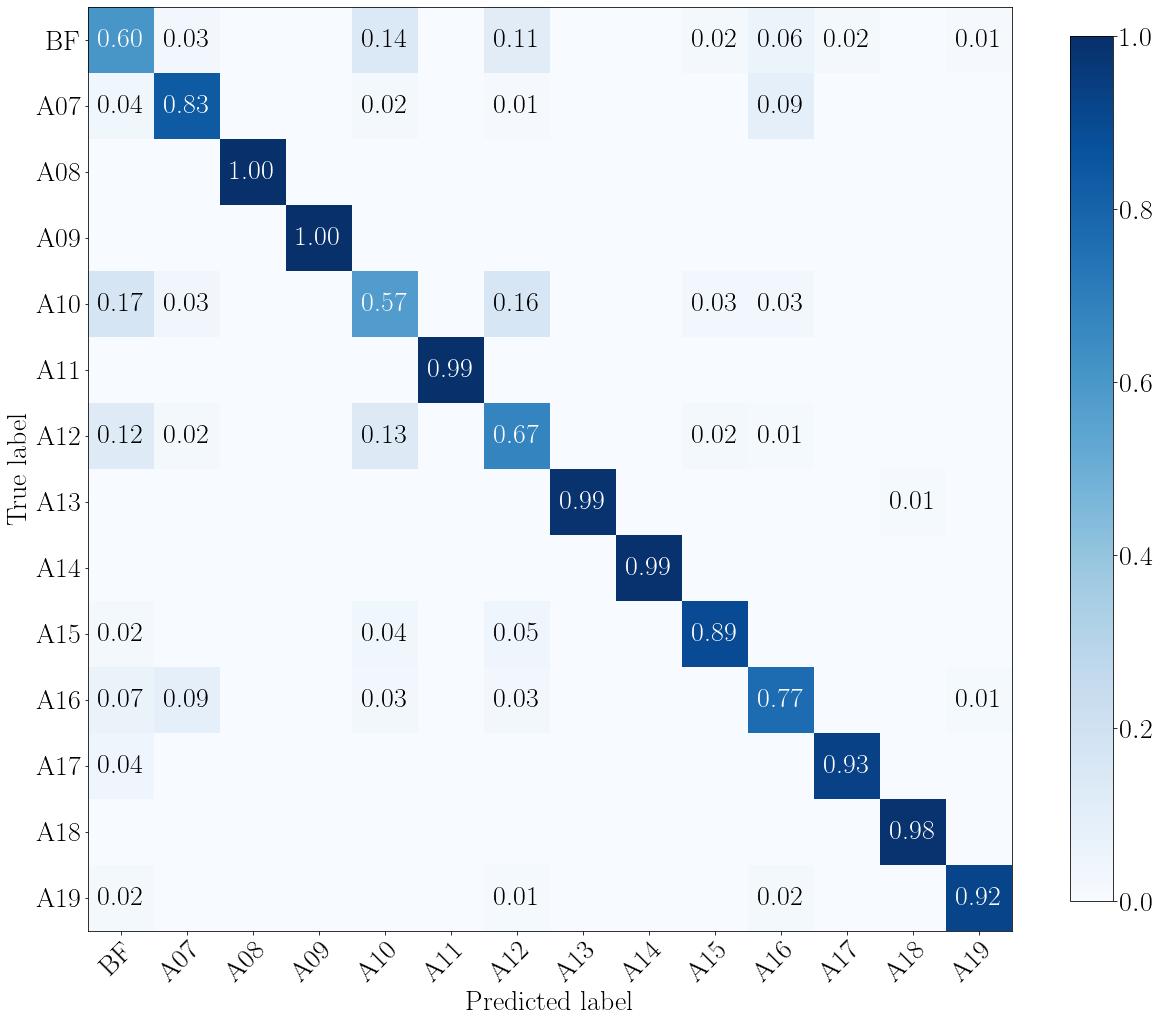

{'class__C': 1, 'class__kernel': 'linear'}
0.8679835659177411
Normalized confusion matrix


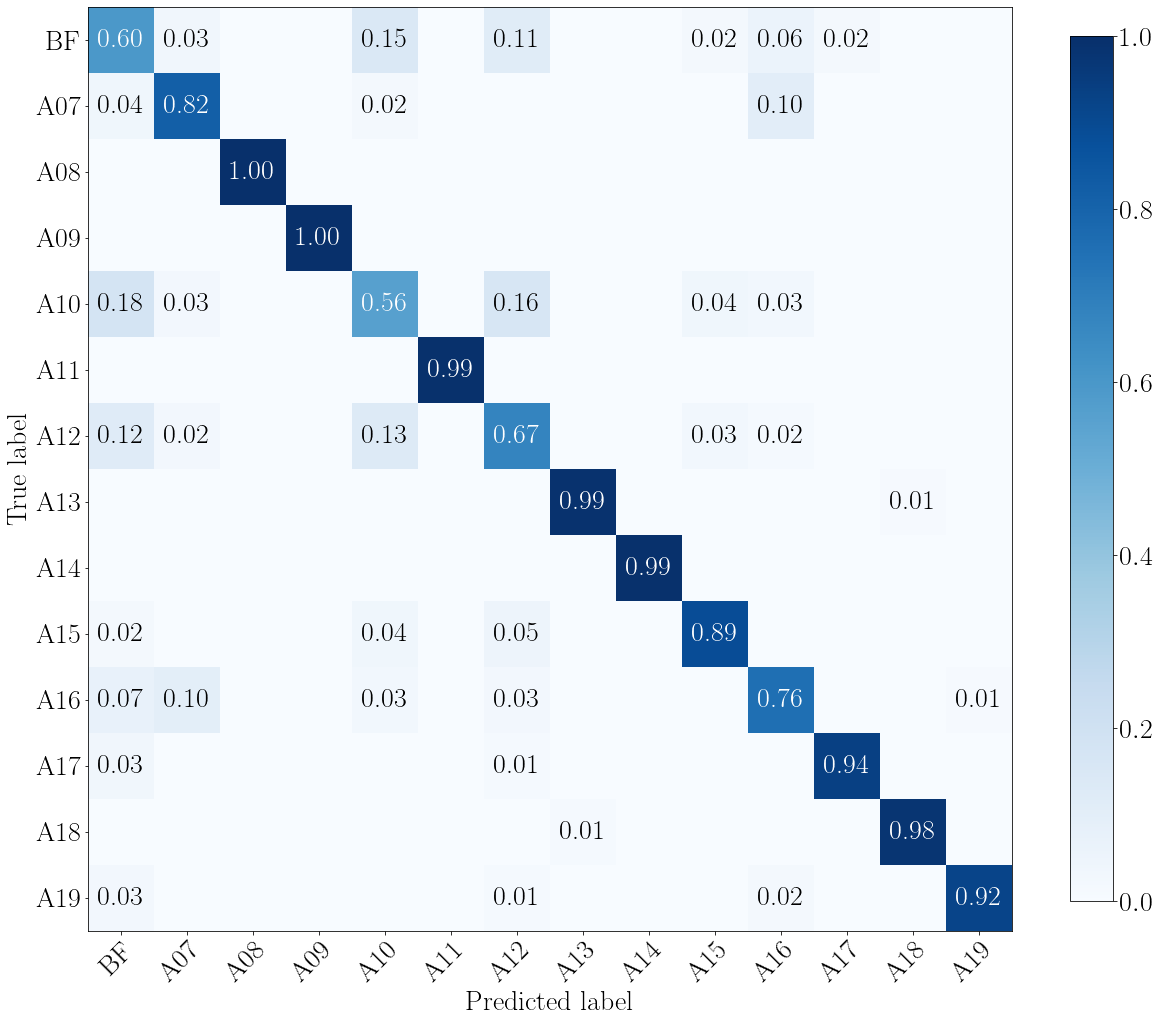

{'class__C': 1, 'class__kernel': 'linear'}
0.8641966767305966
Normalized confusion matrix


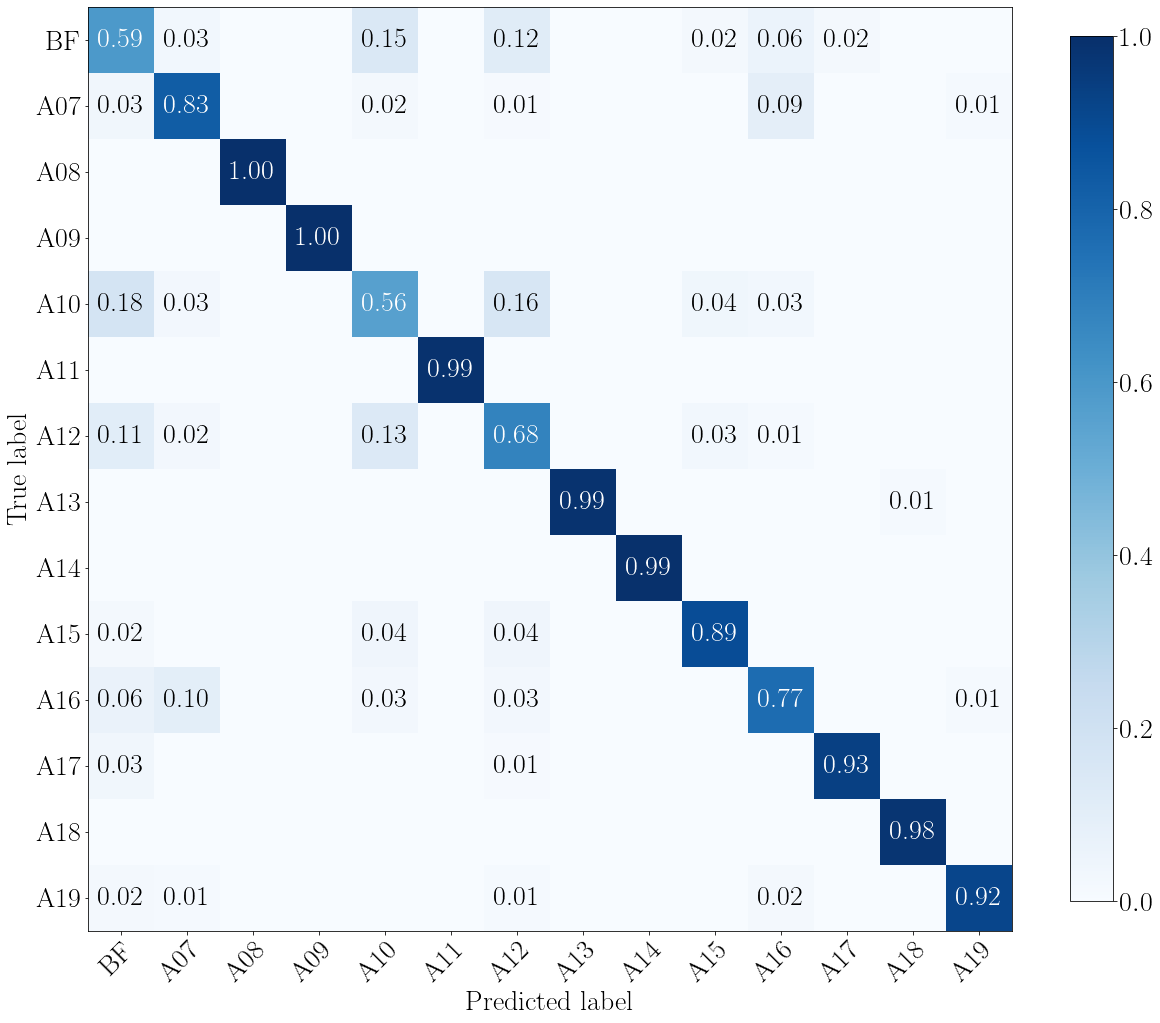

{'class__C': 1, 'class__kernel': 'linear'}
0.8649316417080762
Normalized confusion matrix


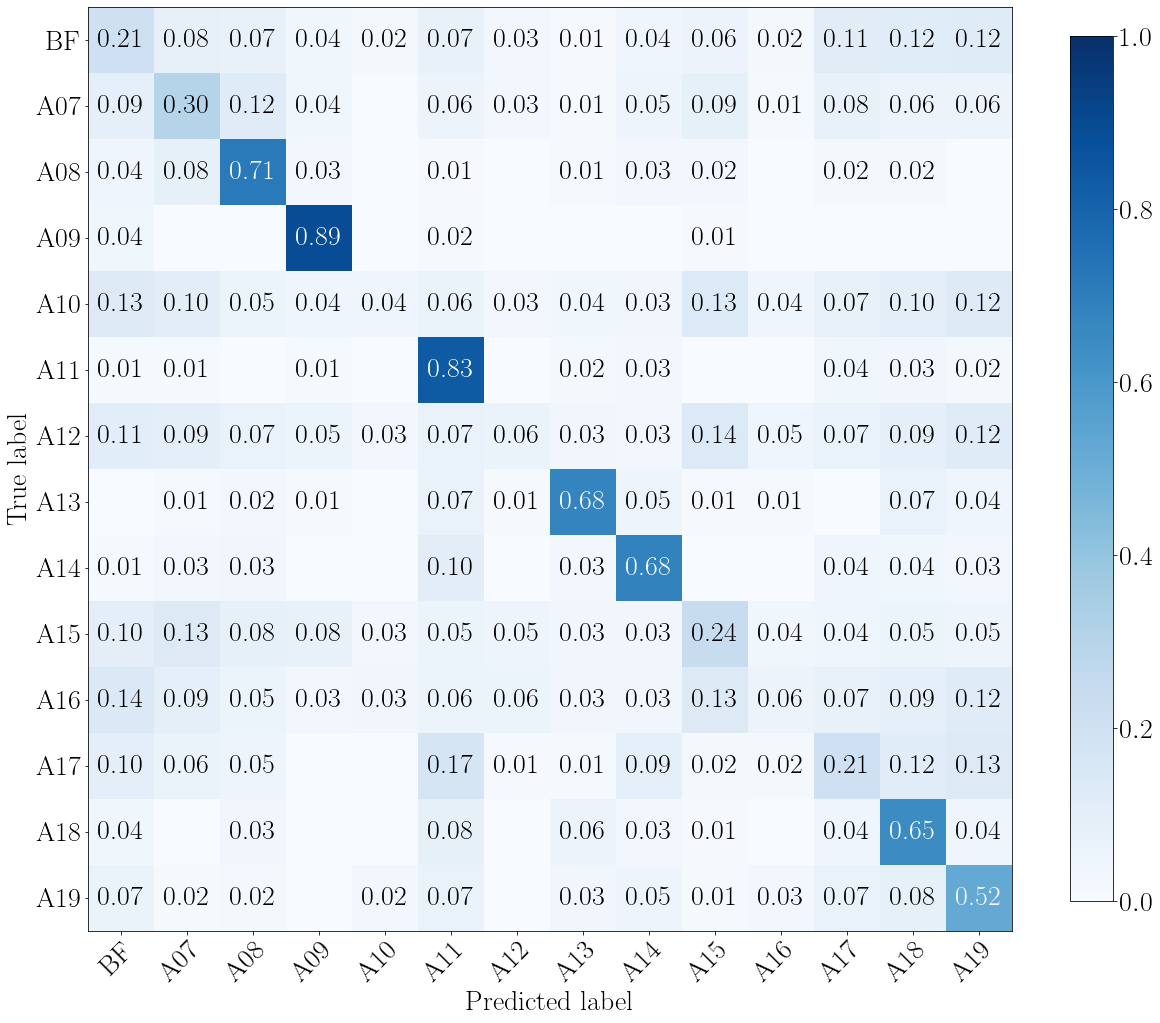

{'class__C': 1000, 'class__decision_function_shape': 'ovo', 'class__gamma': 0.01, 'class__kernel': 'rbf'}
0.4342043240411652
Normalized confusion matrix


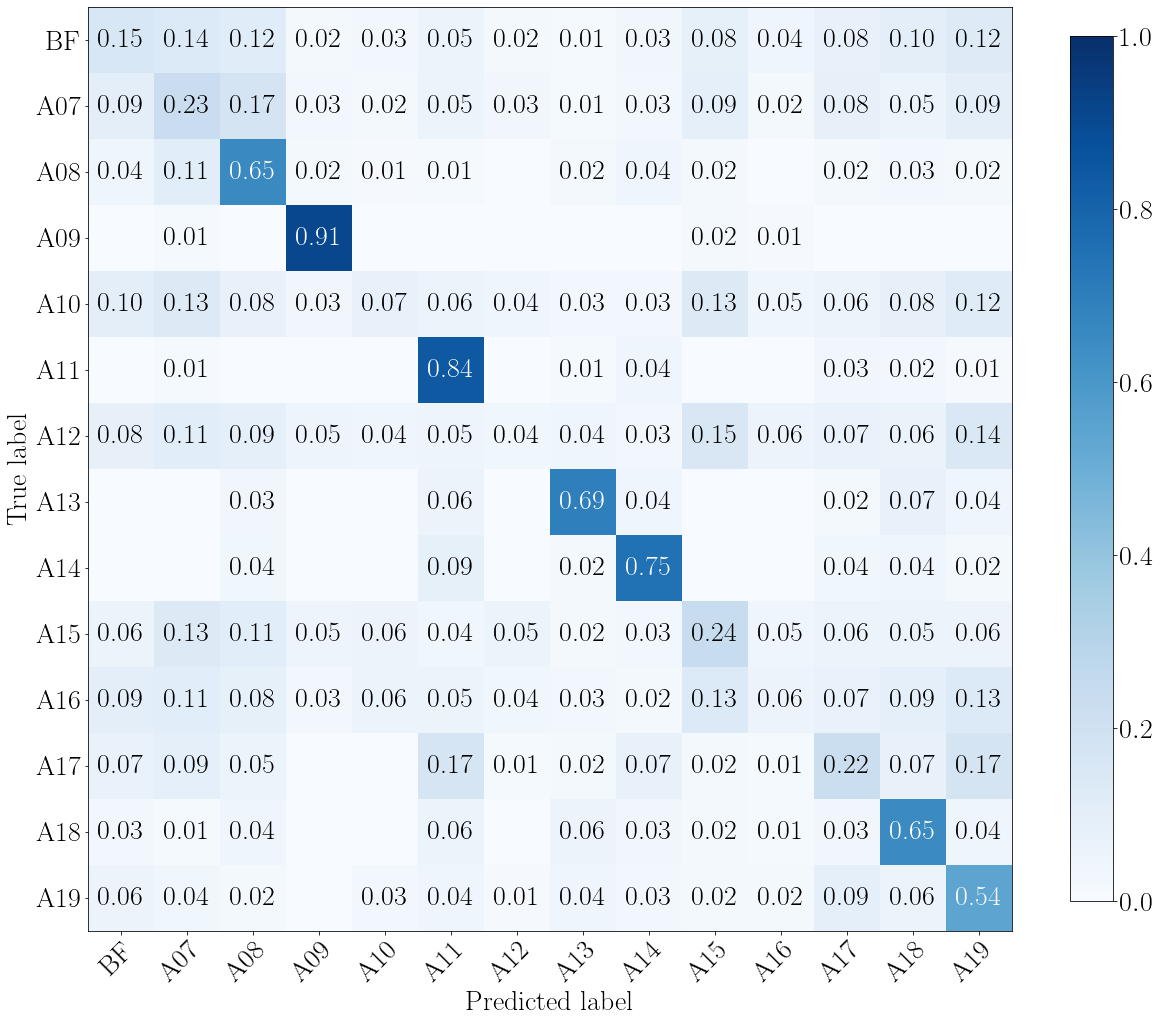

{'class__C': 1000, 'class__decision_function_shape': 'ovo', 'class__gamma': 0.01, 'class__kernel': 'rbf'}
0.43192475105335854
Normalized confusion matrix


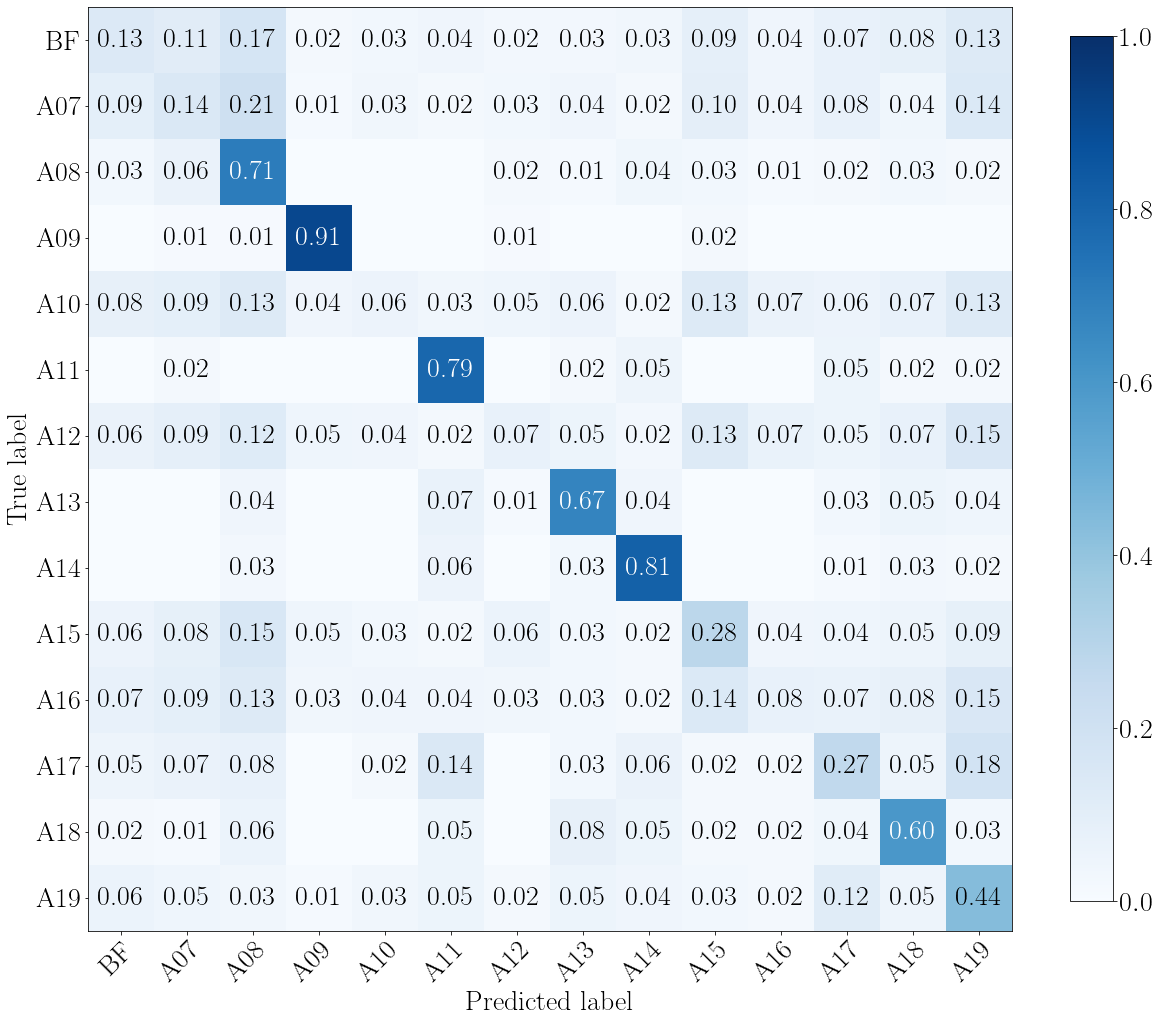

{'class__C': 1000, 'class__decision_function_shape': 'ovo', 'class__gamma': 0.01, 'class__kernel': 'rbf'}
0.4241549862216991
Normalized confusion matrix


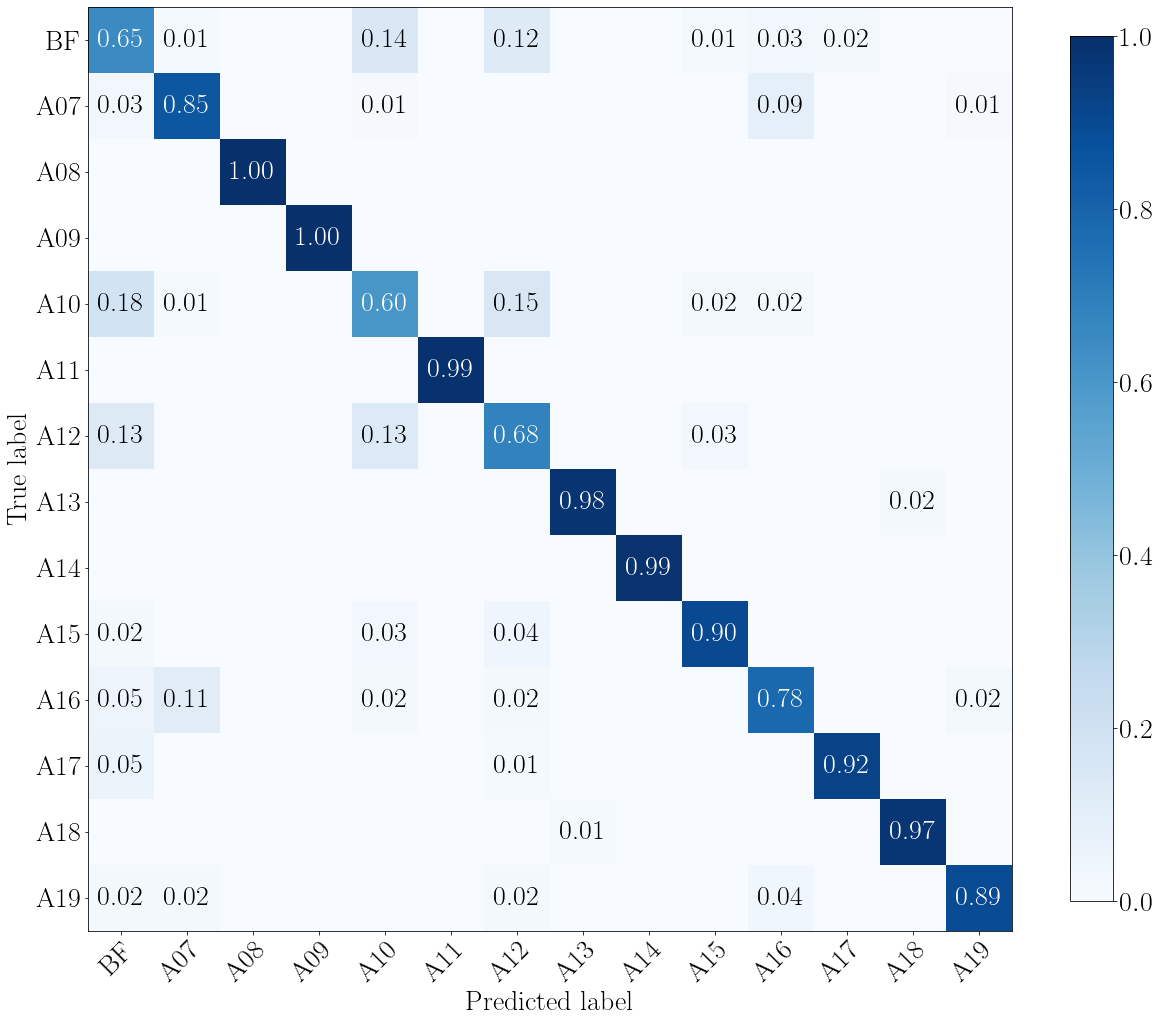

{'class__C': 100, 'class__gamma': 1, 'class__kernel': 'linear'}
0.8725856342092719


In [80]:
for feat in selected_features_list:
    if feat == ['lpc']:
        partial = results_df[([a == feat for a in results_df['selected_features']])
                                ]
        best_row = partial[partial.accuracy_eval == partial.accuracy_eval.max()]
        best_row.reset_index(inplace=True)
        best_row = best_row.iloc[0, :]
        #plt.figure(figsize = (12,12))
        #plt.title("Feat {}".format(feat))
        x_labels = ['BF','A07', 'A08', 'A09', 'A10', 'A11', 'A12', 'A13', 'A14', 'A15', 'A16', 'A17',
                          'A18', 'A19']
        y_labels = x_labels
        my_plot_confusion_matrix(best_row['cm_eval'], normalize=True, x_labels=x_labels, y_labels=y_labels)

        plt.savefig("figures/multi_eval_feat_{}_NFFT_{}_hopsize_{}.png".format(feat, nfft, hop_size))
        plt.show()
        #sns.heatmap(best_row['cm_eval'], annot=True, vmin=0, vmax=1)

        plt.show()
        print(best_row['model_params'])
        print(best_row['accuracy_eval'])

    else:
    
        for fft_params in zip(nfft_list, hop_size_list):
            nfft = fft_params[0]
            hop_size = fft_params[1]
            partial = results_df[(results_df['nfft']==nfft) &
                                 ([a == feat for a in results_df['selected_features']])
                                ]
            best_row = partial[partial.accuracy_eval == partial.accuracy_eval.max()].squeeze()



            #plt.figure(figsize = (12,12))
            #plt.title("Feat {} NFFT {} Hop Size {}".format(feat, nfft, hop_size))

            #sns.heatmap(best_row['cm_eval'], annot=True, vmin=0, vmax=1)
            x_labels = ['BF','A07', 'A08', 'A09', 'A10', 'A11', 'A12', 'A13', 'A14', 'A15', 'A16', 'A17',
                          'A18', 'A19']
            y_labels = x_labels
            my_plot_confusion_matrix(best_row['cm_eval'], normalize=True, x_labels=x_labels, y_labels=y_labels)

            plt.savefig("figures/multi_eval_feat_{}_NFFT_{}_hopsize_{}.png".format(feat, nfft, hop_size))
            plt.show()
            print(best_row['model_params'])
            print(best_row['accuracy_eval'])

